USING MATPLOTLIB (WORKING==Plotting the final data)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
read_data = pd.read_csv("D:\CMU_NML\Mindrove_venv\emg_output_day2\Wflex_Dheemant_day_2_sess1x_redo_start.csv")
df_data = pd.DataFrame(read_data)
df_data.head(5)

,-165.976306,-182.679966,-199.330162,-142.848690,-95.351515,-63.280362,-116.289489,-77.572582
0,-332.099841,-390.383385,-526.828633,-358.100642,-234.057211,-150.420141,-230.697655,-145.635828
1,-172.880536,-224.237405,-435.044170,-248.875650,-146.295762,-88.599058,-119.782018,-59.309071
2,-137.878796,-109.987400,-93.260179,-43.755497,-4.906333,-3.089332,-109.220085,-60.204166
3,-442.370687,-379.343836,-164.740657,-219.301899,-152.152790,-109.830797,-336.434898,-226.317128
4,-669.983109,-710.377580,-830.662070,-617.683087,-415.339255,-274.345470,-481.109372,-313.686918


In [4]:
num_channels = df_data.shape[1]
num_channels

8

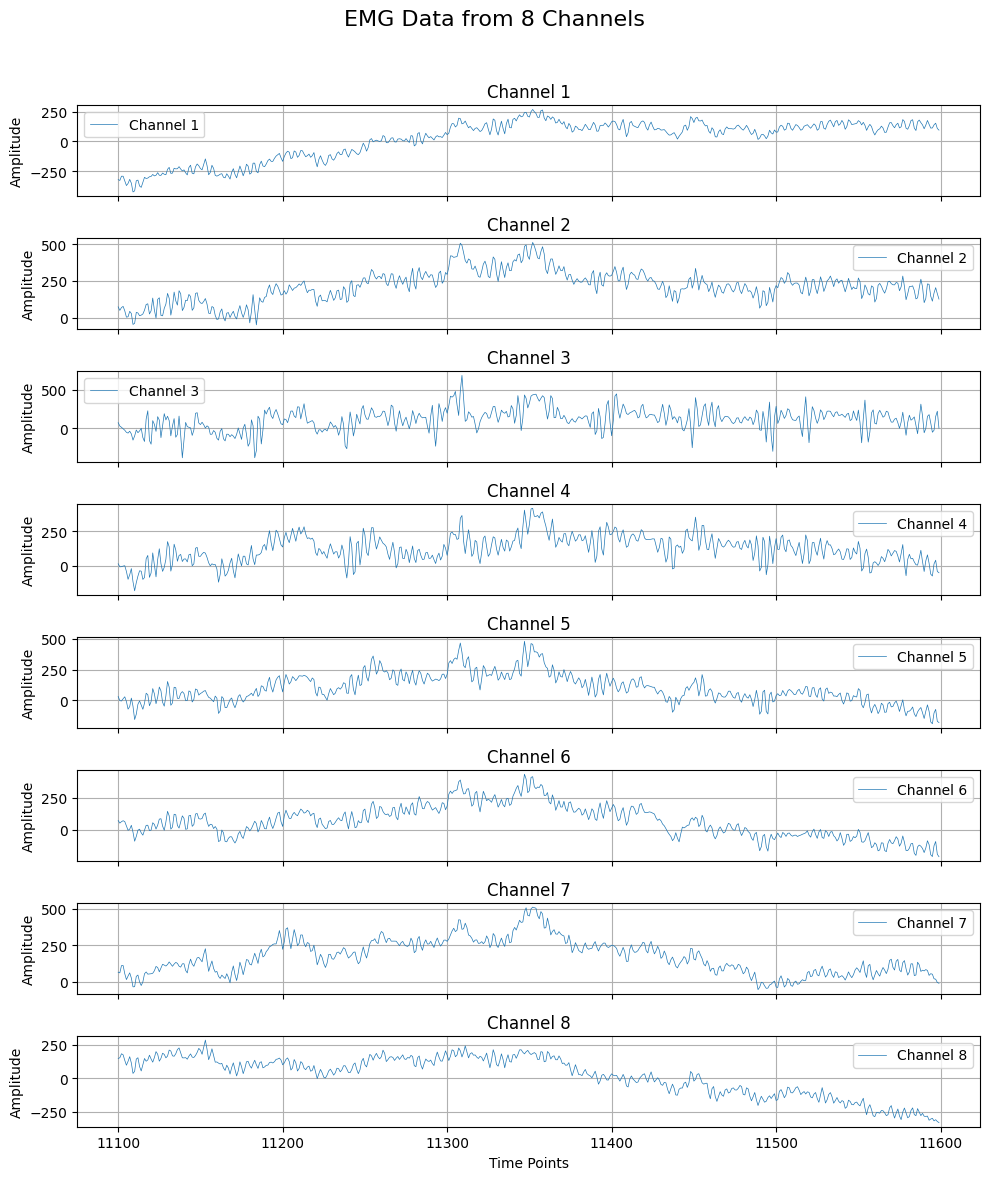

In [6]:
fig, axes = plt.subplots(num_channels, 1, figsize=(10, 12), sharex=True)
fig.suptitle("EMG Data from 8 Channels", fontsize=16)
for i in range(num_channels):
    axes[i].plot(df_data.iloc[11100:11600, i], label=f'Channel {i + 1}', linewidth = 0.5)
    axes[i].set_title(f'Channel {i + 1}')
    axes[i].set_ylabel("Amplitude")
    axes[i].grid(True)
    axes[i].legend()
axes[-1].set_xlabel("Time Points")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [7]:
# Plot each channel in a separate subplot
import mindrove_brainflow

ModuleNotFoundError: No module named 'mindrove_brainflow'

Plotting + RMS Value calculation

In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [66]:
def read_emg_data(file_path):
    return pd.read_csv(file_path)

In [67]:
def calculate_rms(data, time_range=None):
    if time_range:
        data = data.iloc[time_range[0]:time_range[1], :]  # Slice data within time range
    
    rms_values = []
    for channel in data.columns:
        rms = np.sqrt(np.mean(data[channel]**2))  # RMS calculation
        rms_values.append(rms)
    return rms_values

In [93]:
data = df_data.iloc[0:100500, :]
data

,-165.976306,-182.679966,-199.330162,-142.848690,-95.351515,-63.280362,-116.289489,-77.572582
0,-332.099841,-390.383385,-526.828633,-358.100642,-234.057211,-150.420141,-230.697655,-145.635828
1,-172.880536,-224.237405,-435.044170,-248.875650,-146.295762,-88.599058,-119.782018,-59.309071
2,-137.878796,-109.987400,-93.260179,-43.755497,-4.906333,-3.089332,-109.220085,-60.204166
3,-442.370687,-379.343836,-164.740657,-219.301899,-152.152790,-109.830797,-336.434898,-226.317128
4,-669.983109,-710.377580,-830.662070,-617.683087,-415.339255,-274.345470,-481.109372,-313.686918
...,...,...,...,...,...,...,...,...
100495,-580.054870,-31.113804,-344.826474,-201.441000,-211.816766,33.769482,-281.645350,-96.030809
100496,-546.261775,-1.788268,-298.894704,-266.415283,-225.975050,37.889668,-269.859963,-65.954646
100497,-544.903133,29.019153,-103.853757,-192.592166,-211.321845,24.006640,-271.465373,-48.549153
100498,-596.783537,-20.205196,-112.779940,-173.048230,-243.719723,-22.241048,-295.956660,-95.848143


In [ ]:
def plot_emg_data(data, exp_name, time_range=None):
    if time_range:
        data = data.iloc[time_range[0]:time_range[1], :]  # Slice data within time range
        
    num_channels = len(data.columns)
    # print(num_channels)
    fig, axes = plt.subplots(num_channels, 1, figsize=(10, 12), sharex=True)
    fig.suptitle("EMG Data from 8 Channels", fontsize=16)
    for i in range(num_channels):
        axes[i].plot(data.iloc[:, i], label=f'Channel {i + 1}', linewidth = 0.5)
        axes[i].set_title(f'Channel {i + 1}')
        axes[i].set_ylabel("Amplitude")
        axes[i].grid(True)
        axes[i].legend()
    axes[-1].set_xlabel("Time Points")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [69]:
def process_directories(base_path, exp_list, time_range=None):
    rms_per_directory = []
    
    for exp in exp_list:
        full_path = os.path.join(base_path, f"{exp}.csv")  # Assuming CSV file for each experiment
        if not os.path.exists(full_path):
            print(f"File not found: {full_path}")
            continue
        
        data = read_emg_data(full_path)
        rms_values = calculate_rms(data, time_range=time_range)
        rms_per_directory.append(rms_values)
        
        plot_emg_data(data, exp, time_range=time_range)
    
    return rms_per_directory

In [70]:
prim_path = str("D:\\CMU_NML\\Mindrove_venv\\emg_output_day2\\")
day2_exp_list = [
    'Wflex_Dheemant_day_2_sess1x_redo_start',
    'Wflex_Dheemant_day_2_sess2x_redo_start',
    'Wflex_Dheemant_day_2_sess3x_redo_start',
    'Wflex_Dheemant_day_2_sess4x_redo_start',
    'Wflex_Dheemant_day_2_sess5x_redo_start',
    'Wflex_Dheemant_day_2_sess6x_redo_start',
    'Wflex_Dheemant_day_2_sess7x_redo_start'
]

In [110]:
# full_path = os.path.join(prim_path, f"{day2_exp_list[6]}.csv")
time_range = (0,1005000)

8


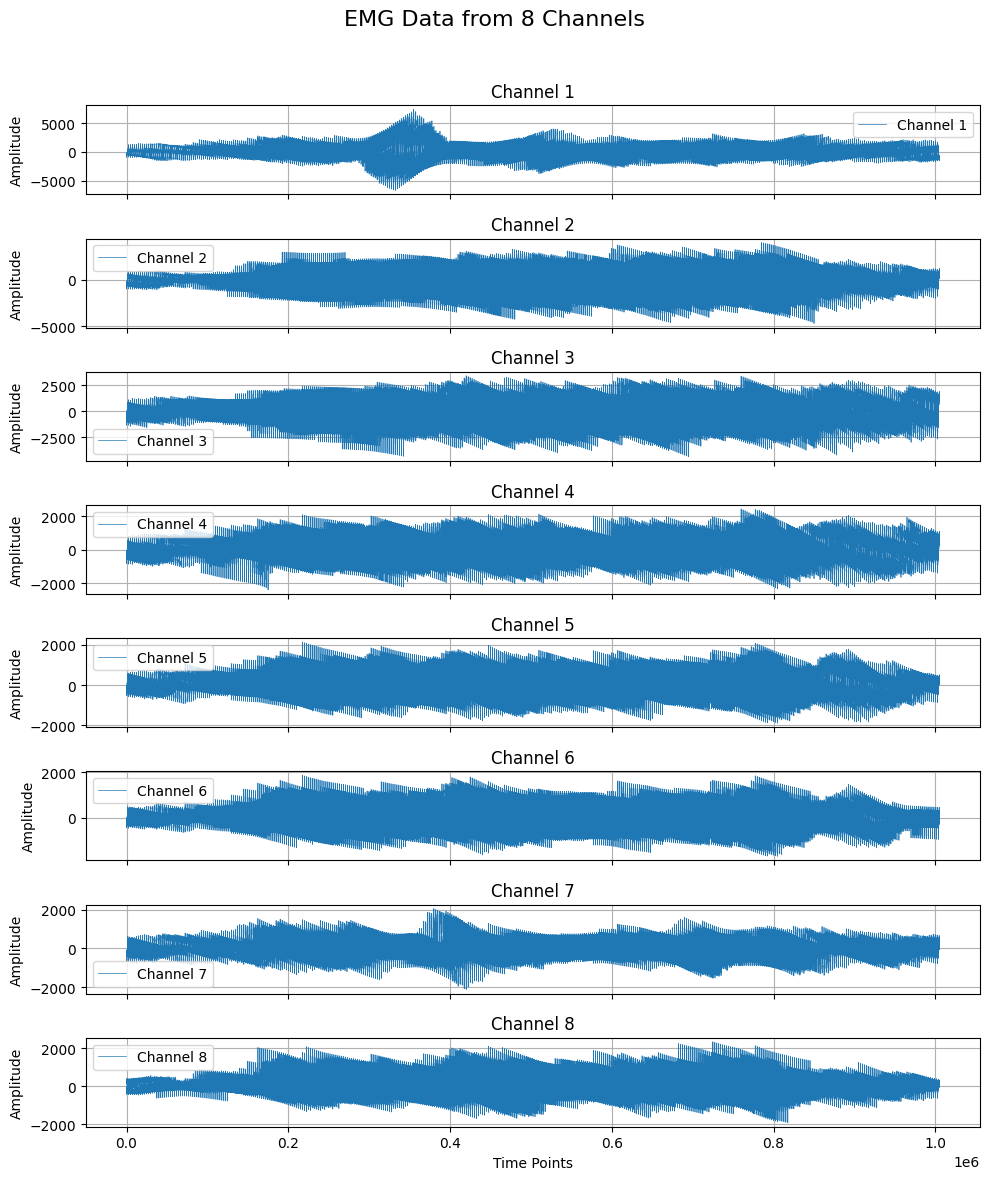

8


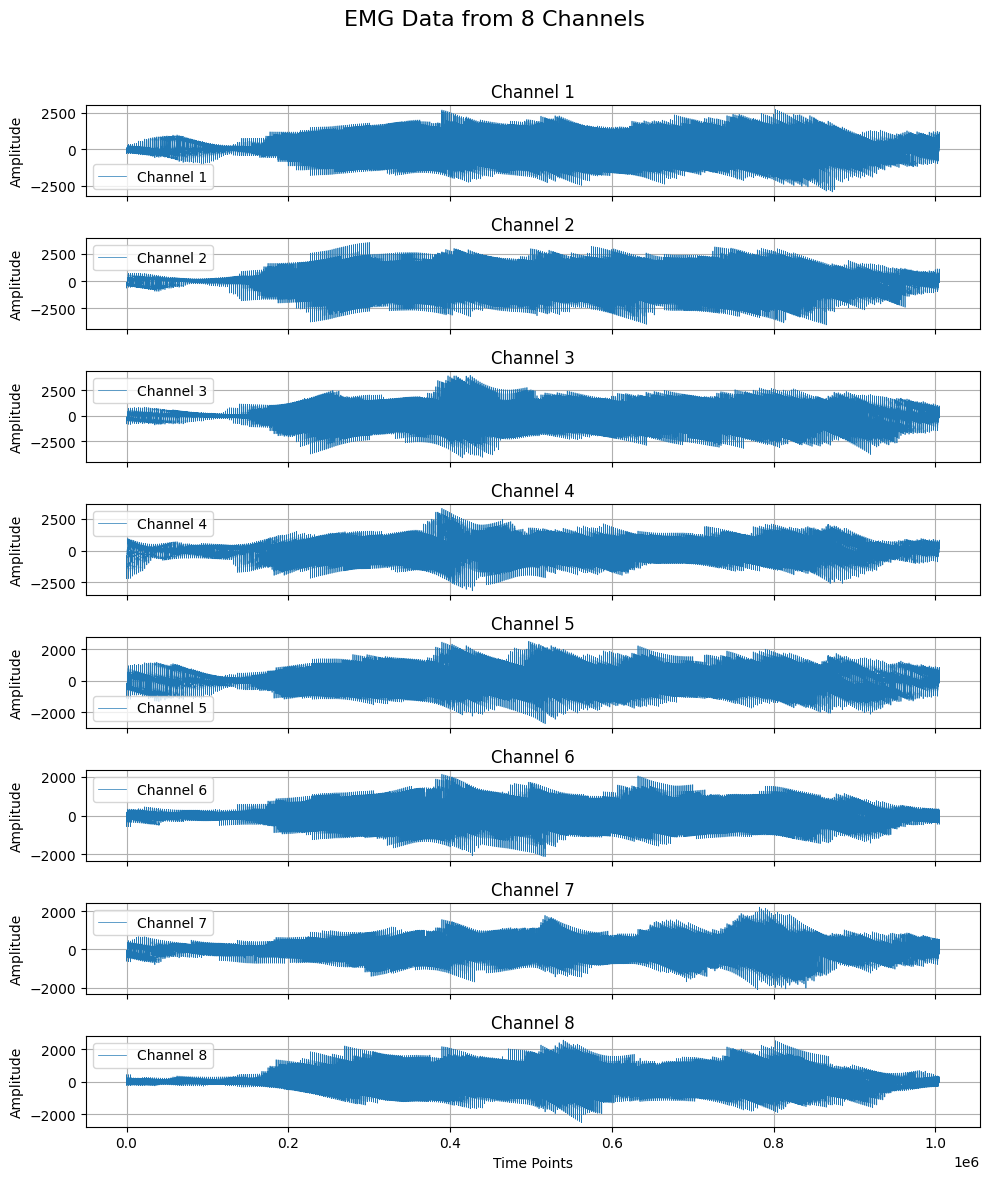

8


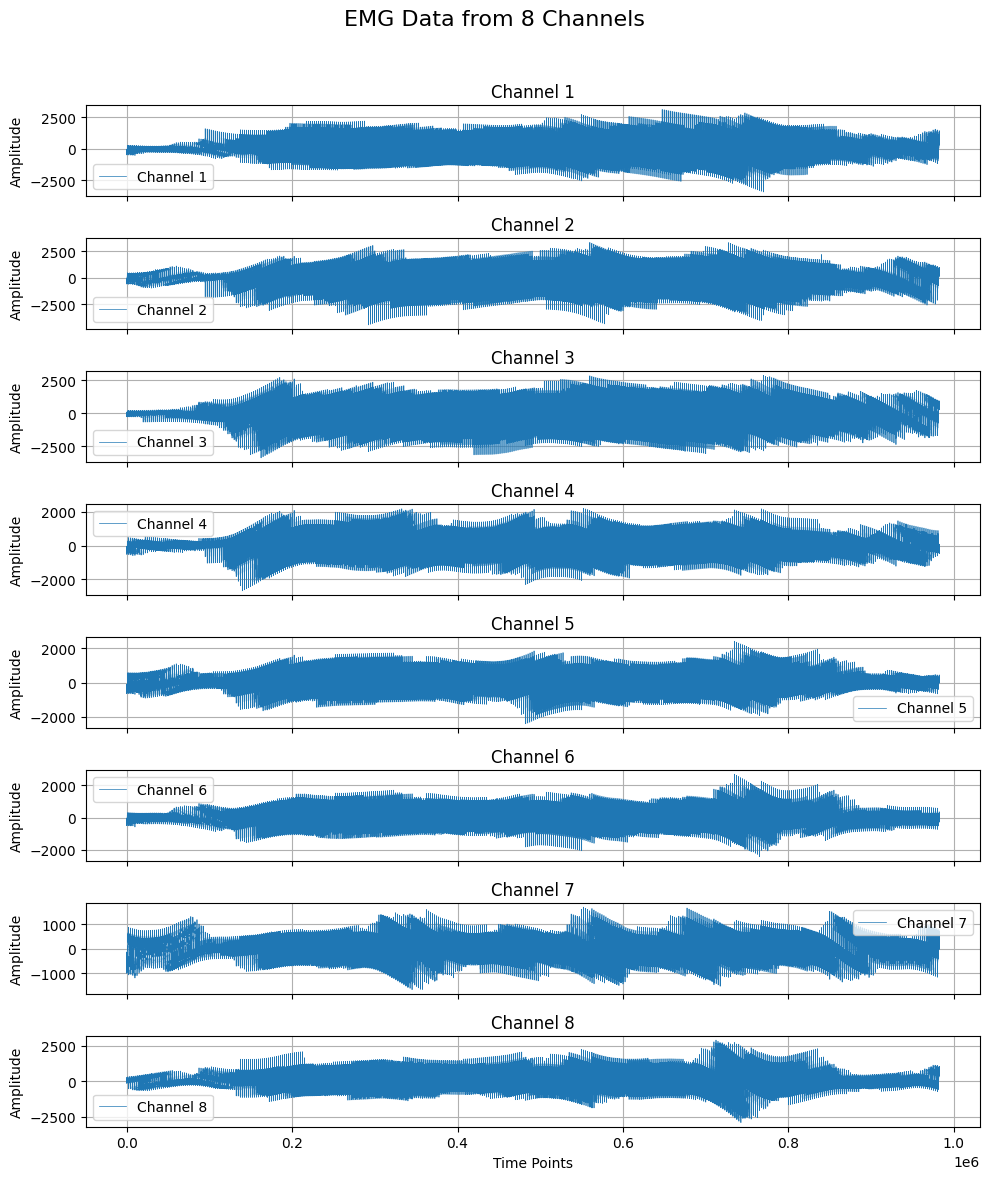

8


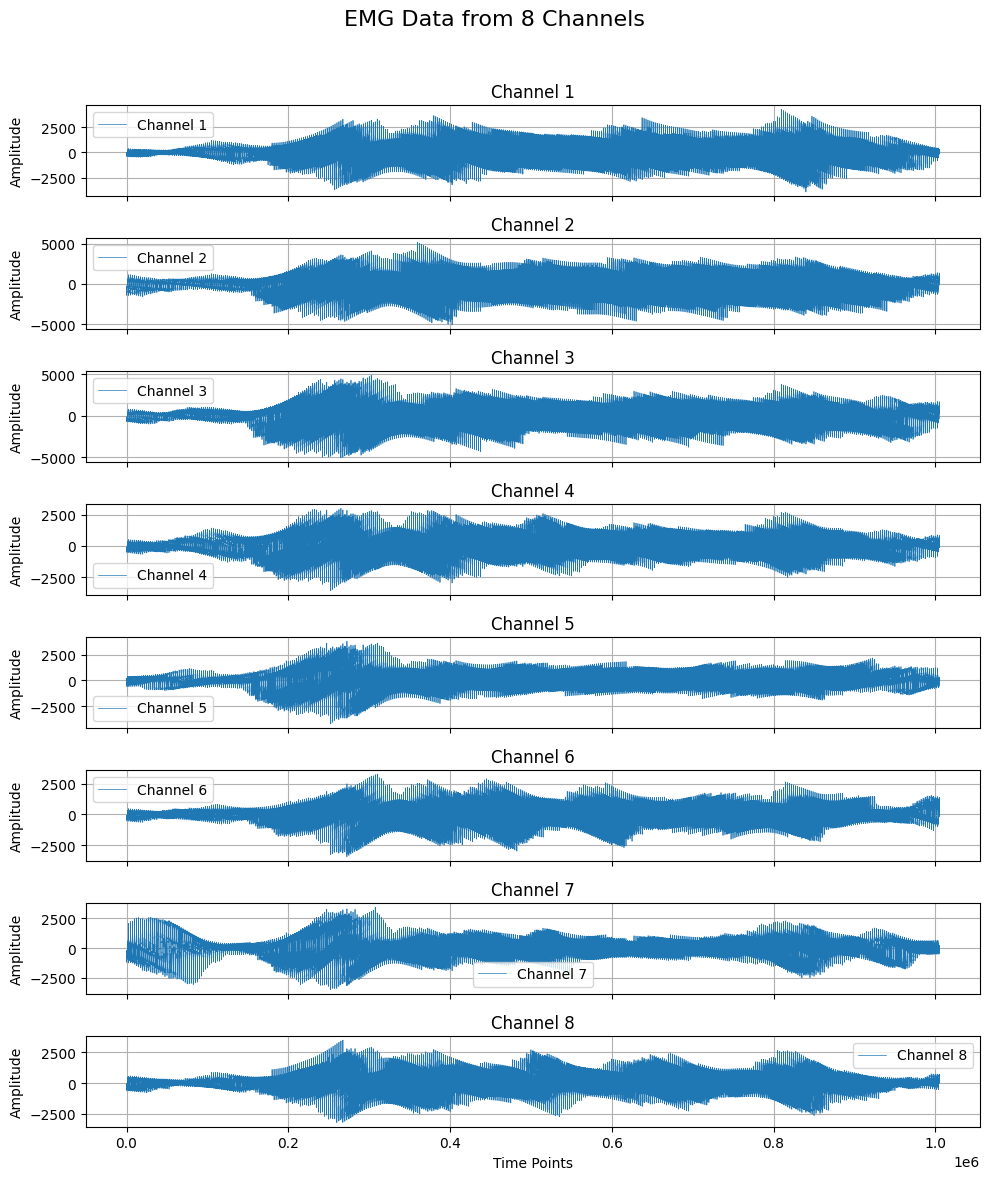

8


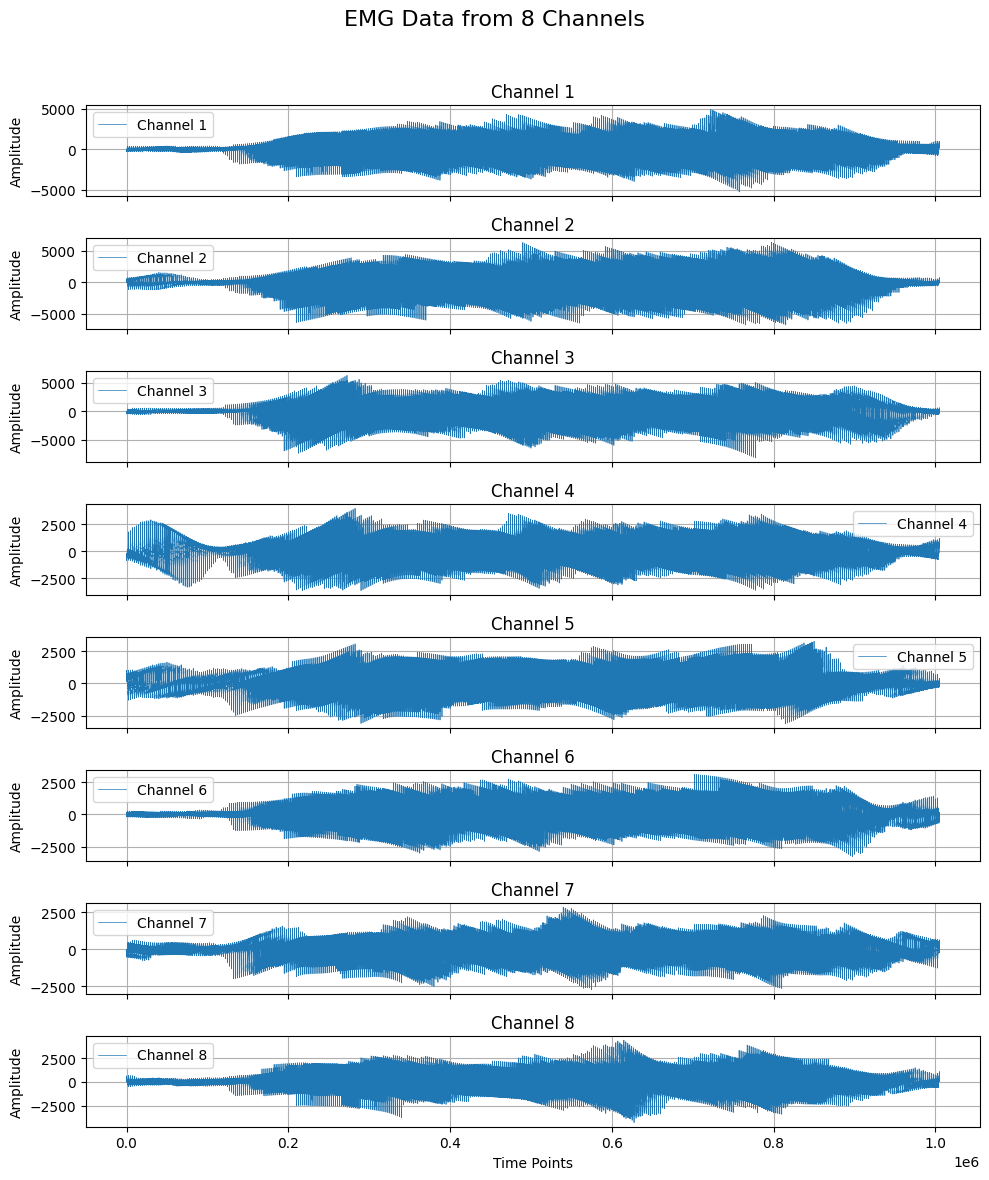

8


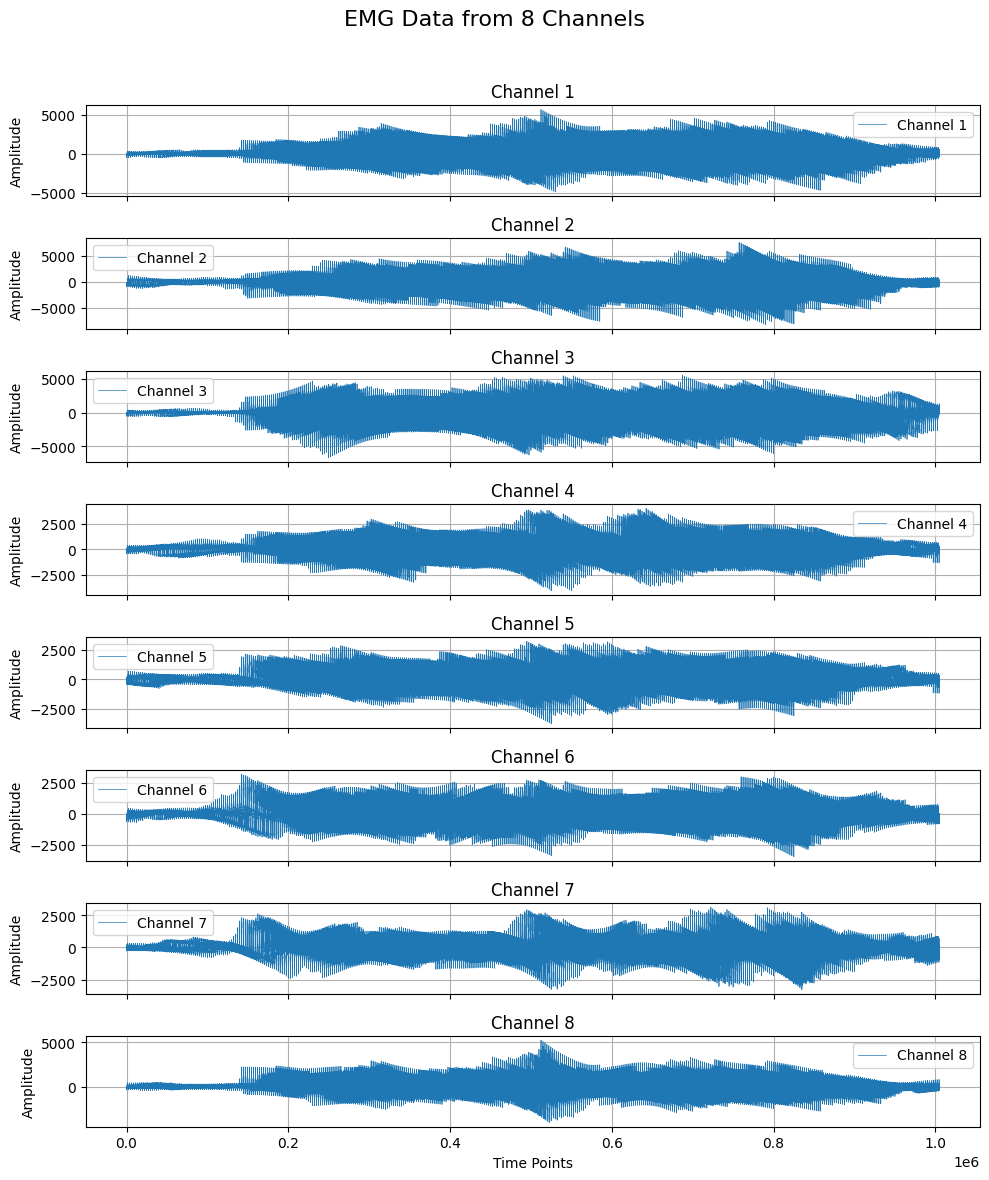

8


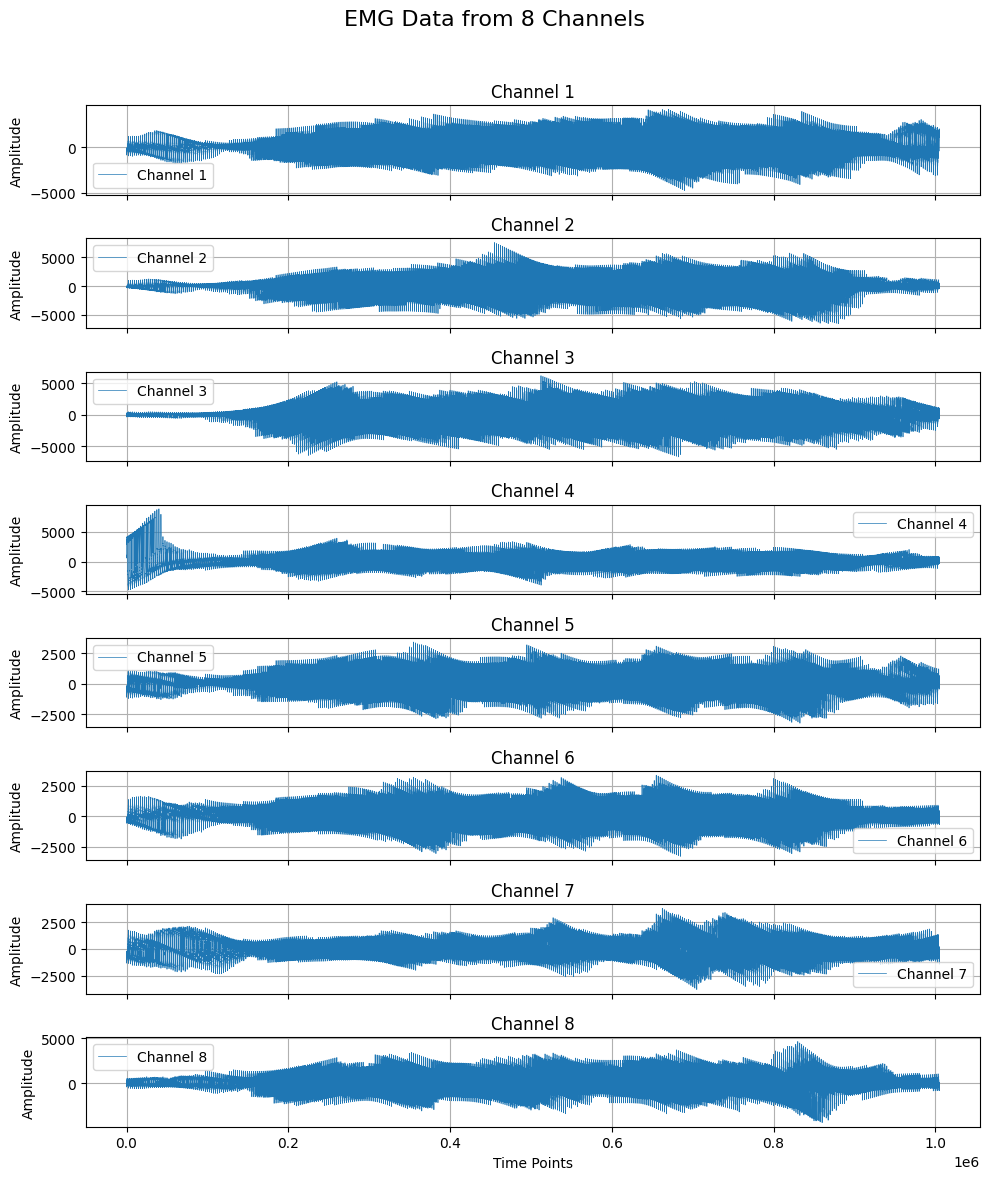

In [111]:
rms_results = process_directories(prim_path, day2_exp_list, time_range=time_range)

In [112]:
for idx, rms_values in enumerate(rms_results):
    print(f"RMS values for {day2_exp_list[idx]}: {rms_values}")

RMS values for Wflex_Dheemant_day_2_sess1x_redo_start: [np.float64(1046.6163428021985), np.float64(782.8916589417385), np.float64(831.6025535592564), np.float64(555.332110796406), np.float64(427.859334088014), np.float64(340.8105810841364), np.float64(401.6298321494474), np.float64(369.6202707544538)]
RMS values for Wflex_Dheemant_day_2_sess2x_redo_start: [np.float64(530.949913133471), np.float64(694.7157852033463), np.float64(743.4374346367372), np.float64(568.3797560529414), np.float64(520.6771398915876), np.float64(341.18346593640285), np.float64(405.05264829120216), np.float64(411.2619272393157)]
RMS values for Wflex_Dheemant_day_2_sess3x_redo_start: [np.float64(479.6478497461671), np.float64(703.147982415185), np.float64(633.0462841672439), np.float64(467.48997143013884), np.float64(387.12321024412205), np.float64(384.7877035315796), np.float64(370.27176906980543), np.float64(427.9412123780435)]
RMS values for Wflex_Dheemant_day_2_sess4x_redo_start: [np.float64(733.8369517148406),

In [113]:
num_channels = len(rms_results[0])  # Number of channels
num_experiments = len(day2_exp_list)  # Number of experiments

In [114]:
rms_results_array = np.array(rms_results)

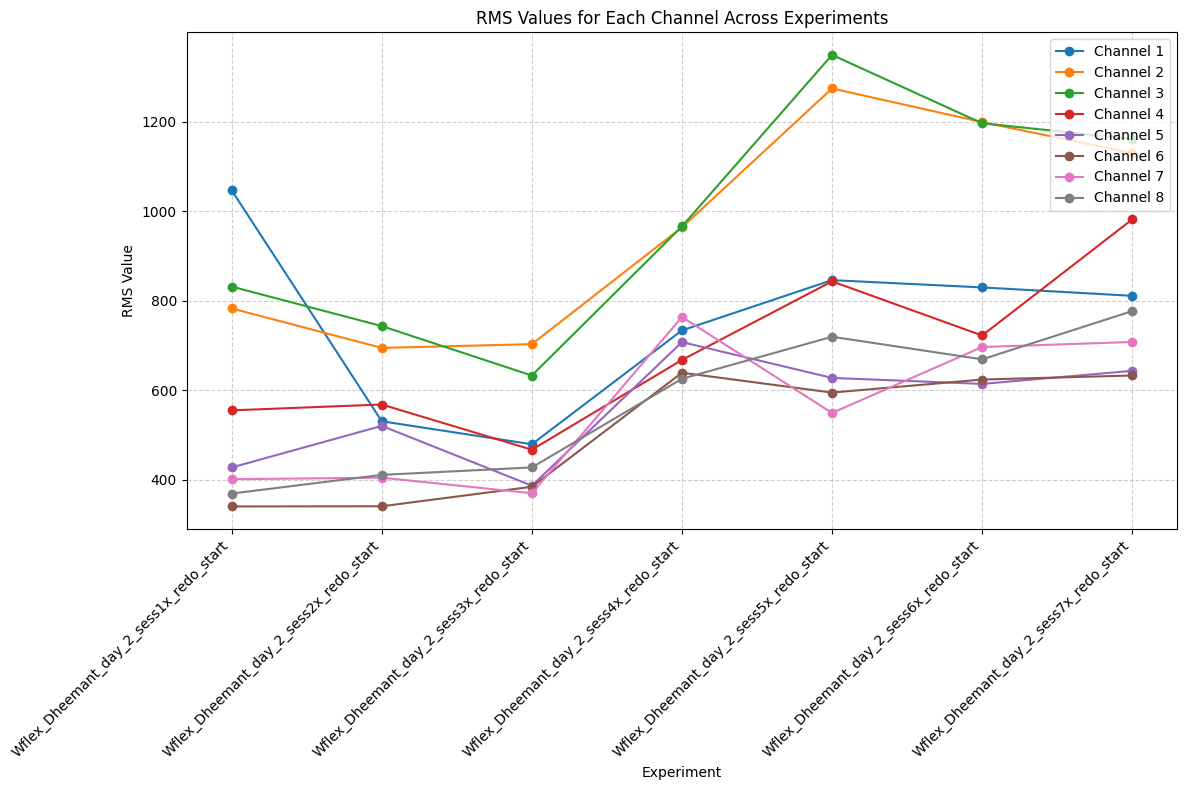

In [ ]:
plt.figure(figsize=(12, 8))

for channel in range(num_channels):
    channel_rms = rms_results_array[:, channel]  # Extract RMS values for this channel across experiments
    plt.plot(
        range(num_experiments), 
        channel_rms, 
        marker='o', 
        label=f'Channel {channel + 1}'
    )

# Add labels, legend, and grid
plt.xticks(range(num_experiments), day2_exp_list, rotation=45, ha='right')
plt.xlabel('Experiment')
plt.ylabel('RMS Value')
plt.title('RMS Values for Each Channel Across Experiments')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [120]:
prim_path = str("D:\\CMU_NML\\Mindrove_venv\\emg_output\\")
day2_exp_list = [
    'Wflex_Dheemant_sess1_3',
    'Wflex_Dheemant_sess2_1',
    'Wflex_Dheemant_sess3_1'
]

In [1]:
time_range = (11000, 11100)
rms_results = process_directories(prim_path, day2_exp_list, time_range=time_range)

NameError: name 'process_directories' is not defined

In [124]:
for idx, rms_values in enumerate(rms_results):
    print(f"RMS values for {day2_exp_list[idx]}: {rms_values}")

RMS values for Wflex_Dheemant_sess1_3: [np.float64(467.504405966053), np.float64(893.7126295401695), np.float64(1103.5334995367193), np.float64(1162.7674385759897), np.float64(589.3770424646048), np.float64(346.0144234073597), np.float64(224.42412750680722), np.float64(355.35053346095276)]
RMS values for Wflex_Dheemant_sess2_1: [np.float64(466.7887666422269), np.float64(820.805890665243), np.float64(1580.1406588800637), np.float64(1155.1918342027868), np.float64(604.0588828499286), np.float64(1132.7478244457056), np.float64(227.18046114159304), np.float64(293.01537155304965)]
RMS values for Wflex_Dheemant_sess3_1: [np.float64(563.9095289523252), np.float64(759.5115787048642), np.float64(1030.1661195051593), np.float64(1782.8394179242546), np.float64(548.1097786512375), np.float64(399.32475083763285), np.float64(340.9227777842472), np.float64(386.18035672255235)]


In [125]:
num_channels = len(rms_results[0])  # Number of channels
num_experiments = len(day2_exp_list)  # Number of experiments

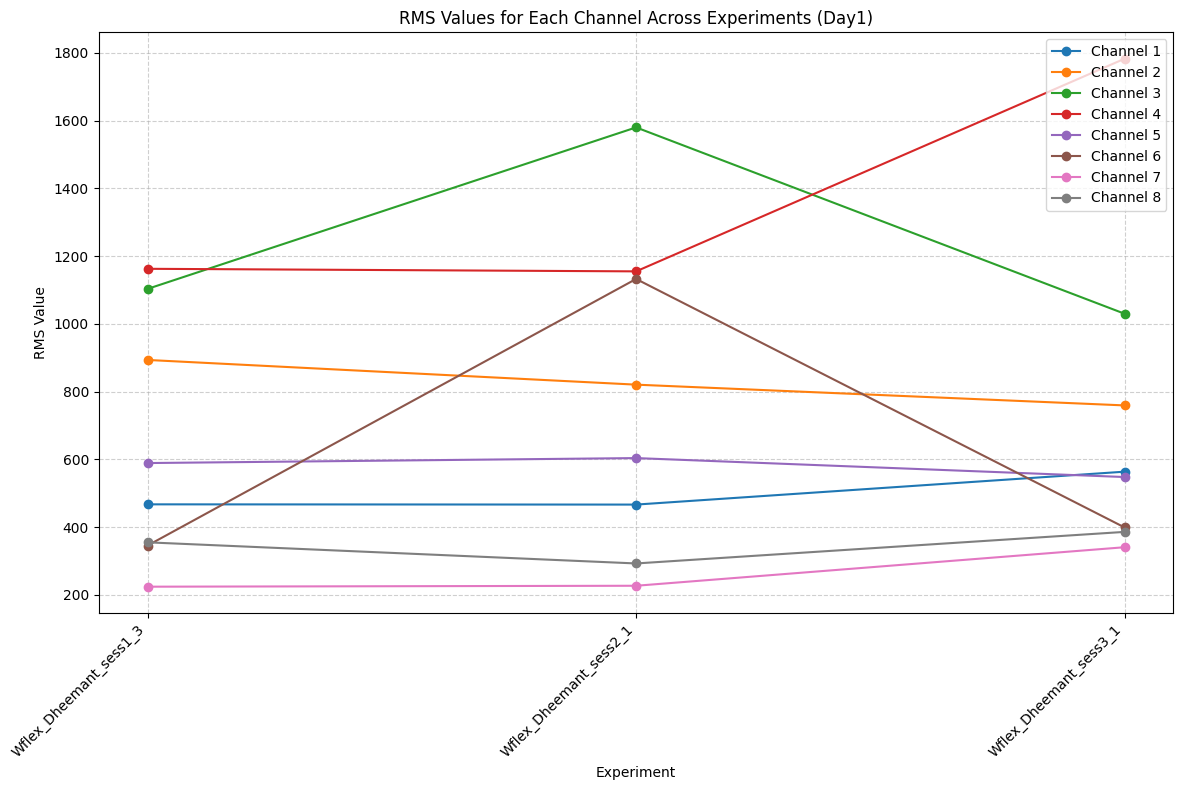

In [127]:
rms_results_array = np.array(rms_results)
plt.figure(figsize=(12, 8))

for channel in range(num_channels):
    channel_rms = rms_results_array[:, channel]  # Extract RMS values for this channel across experiments
    plt.plot(
        range(num_experiments), 
        channel_rms, 
        marker='o', 
        label=f'Channel {channel + 1}'
    )

# Add labels, legend, and grid
plt.xticks(range(num_experiments), day2_exp_list, rotation=45, ha='right')
plt.xlabel('Experiment')
plt.ylabel('RMS Value')
plt.title('RMS Values for Each Channel Across Experiments (Day1)')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()